In [ ]:
#1. Setup and Load Data

In [ ]:
# 1.1 Install Dependencies and Setup

In [1]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Using cached matplotlib-3.7.1-cp39-cp39-win_amd64.whl (7.6 MB)
  Running setup.py clean for tensorflow-gpu
Failed to build tensorflow-gpu
    Running setup.py install for tensorflow-gpu: started
    Running setup.py install for tensorflow-gpu: finished with status 'error'


  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\asaas\anaconda3\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\asaas\\AppData\\Local\\Temp\\pip-install-tx1cmj1c\\tensorflow-gpu_40761f6a60934890ac1218fef78b8bcd\\setup.py'"'"'; __file__='"'"'C:\\Users\\asaas\\AppData\\Local\\Temp\\pip-install-tx1cmj1c\\tensorflow-gpu_40761f6a60934890ac1218fef78b8bcd\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\asaas\AppData\Local\Temp\pip-wheel-xevm5dki'
       cwd: C:\Users\asaas\AppData\Local\Temp\pip-install-tx1cmj1c\tensorflow-gpu_40761f6a60934890ac1218fef78b8bcd\
  Complete output (17 lines):
  Traceback (most recent call last):
    File "<string>", line 1, in <module>
    File "C:\Us

In [16]:
!pip install matplotlib

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
object-detection 0.1 requires apache-beam, which is not installed.
object-detection 0.1 requires avro-python3, which is not installed.
object-detection 0.1 requires pycocotools, which is not installed.
tf-models-official 2.11.5 requires gin-config, which is not installed.
tf-models-official 2.11.5 requires google-api-python-client>=1.6.7, which is not installed.
tf-models-official 2.11.5 requires immutabledict, which is not installed.
tf-models-official 2.11.5 requires kaggle>=1.3.9, which is not installed.
tf-models-official 2.11.5 requires oauth2client, which is not installed.
tf-models-official 2.11.5 requires opencv-python-headless, which is not installed.
tf-models-official 2.11.5 requires py-cpuinfo>=3.3.0, which is not installed.
tf-models-official 2.11.5 requires pycocotools, which is not installed.
tf-mod


  Using cached matplotlib-3.7.1-cp39-cp39-win_amd64.whl (7.6 MB)


In [2]:
pip list

Package                            Version
---------------------------------- --------------------
absl-py                            1.4.0
alabaster                          0.7.12
anaconda-client                    1.9.0
anaconda-navigator                 2.1.1
anaconda-project                   0.10.1
anyio                              2.2.0
appdirs                            1.4.4
argh                               0.26.2
argon2-cffi                        20.1.0
arrow                              0.13.1
asn1crypto                         1.4.0
astroid                            2.6.6
astropy                            4.3.1
astunparse                         1.6.3
async-generator                    1.10
atomicwrites                       1.4.0
attrs                              21.2.0
autopep8                           1.5.7
Babel                              2.9.1
backcall                           0.2.0
backports.functools-lru-cache      1.6.4
backports.shutil-get-terminal-size 

In [3]:
import tensorflow as tf
import os

In [ ]:
#we will use keras sequential API to implement the Deep Learning Model

In [4]:
# Avoid OOM (out of memory) error by setting GPU Memory Consumption Growth

gpus=tf.config.experimental.list_physical_devices('GPU')
gpus
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)

In [5]:
gpus

[]

In [ ]:
#remove dodgy images

In [6]:
import cv2
import imghdr

In [7]:
data_dir='data'

In [14]:
os.listdir(os.path.join(data_dir,'happy'))

['05-12-21-happy-people.jpg',
 '10-Habits-of-Happy-People-Seniors-Today.jpg',
 '110754-utyeqqosky-1547658396.jpeg',
 '170404-happy-workers-feature.jpg',
 '1920px-face-smile.svg_.png.jpg',
 '1_617fd1e2590c2.jpg',
 '20150413185238-secrets-happy-entrepreneurs-woman-gratitude-rainbow-.jpeg',
 '2560px-Happy_People.jpg',
 '35438_hd.jpg',
 '56f455011e0000b300705475.jpeg',
 '613k1XcpYCL._SL1200_.jpg',
 '7-Habits-of-Happy-People-image.jpeg',
 '7-principles-of-successful-and-happy-people.png',
 '71hBPTAhIXL.jpg',
 '960x0.jpg',
 '988689_Wallpaper2.jpg',
 'A_Sep20_14_1189155141.jpg',
 'cess-group-positive-friends-celebrate-victory-achievement-together_1016-9922.jpg',
 'cheerful-middle-eastern-family-three-260nw-1936256839.jpg',
 'compassion-900x387.jpg',
 'Dollarphotoclub_76084977-1.jpg',
 'file-20230208-27-3jttof.jpg',
 'friends-happy-190821.jpg',
 'friends_190412.jpg',
 'gdfVVm_MyCRtqpvdkt8vtSB1n_oz_CpwCq6vNMpj0S8.jpg',
 'GettyImages-1152307607_525151_wrcmhy.jpg',
 'GettyImages-871518740.jpg',
 

In [8]:
image_exts=['jpeg','jpg','bmp','png']

In [10]:
image_exts

['jpeg', 'jpg', 'bmp', 'png']

In [17]:
from matplotlib import pyplot as plt

In [38]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir,image_class)):
        image_path=os.path.join(data_dir,image_class,image)
        try:
            img=cv2.imread(image_path)
            tip=imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            os.remove(image_path)
            
                

Issue with image data\happy\11739478-composition-of-smiling-people.jpg
Issue with image data\happy\2560px-Happy_People.jpg
Issue with image data\happy\44205694-smiling-people.jpg
Issue with image data\happy\56f455011e0000b300705475.jpeg
Issue with image data\happy\5caf0f54230000a5006dafcc.jpeg
Issue with image data\happy\68078864.jpg
Issue with image data\happy\68132555-smiling-faces-happy-group-of-multiethnic-people-men-and-women.jpg
Issue with image data\happy\68919653-international-group-of-happy-smiling-people.jpg
Issue with image data\happy\73304843-international-group-of-happy-smiling-people.jpg
Issue with image data\happy\cheerful-middle-eastern-family-three-260nw-1936256839.jpg
Issue with image data\happy\crowd-young-happy-smiling-people-260nw-1616047684.jpg
Issue with image data\happy\g-faces-of-people-happy-men-and-women-expressing-different-positive-emotions.jpg
Issue with image data\happy\guilherme-stecanella-375176-unsplash.jpg
Issue with image data\happy\happy-group-young

In [ ]:
# 1.3 Load Data

In [39]:
import numpy as np

In [69]:
data=tf.keras.utils.image_dataset_from_directory('data')

Found 619 files belonging to 2 classes.


In [70]:
data_iterator=data.as_numpy_iterator()

In [71]:
data_iterator

In [72]:
batch= data_iterator.next()

In [73]:
#Images represented as numpy arrays
batch[0].shape

(32, 256, 256, 3)

In [49]:
batch[1]
 #0 is happy and 1 is sad

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0])

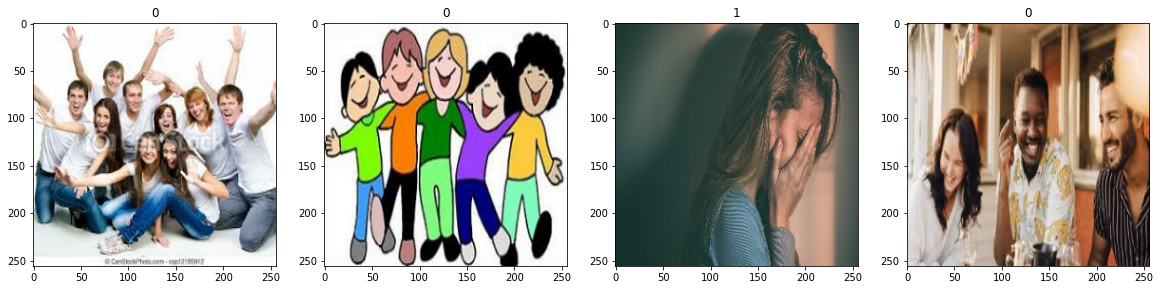

In [74]:
fig, ax=plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [ ]:
#Preprocess Data

In [75]:
data=data.map(lambda x,y:(x/255,y))

In [76]:
data.as_numpy_iterator().next()

(array([[[[0.19215687, 0.4       , 0.5254902 ],
          [0.19215687, 0.4       , 0.5254902 ],
          [0.19215687, 0.4       , 0.5254902 ],
          ...,
          [0.59607846, 0.7607843 , 0.84705883],
          [0.59607846, 0.7607843 , 0.84705883],
          [0.59607846, 0.7607843 , 0.84705883]],
 
         [[0.19215687, 0.4       , 0.5254902 ],
          [0.19215687, 0.4       , 0.5254902 ],
          [0.19215687, 0.4       , 0.5254902 ],
          ...,
          [0.59607846, 0.7607843 , 0.84705883],
          [0.59607846, 0.7607843 , 0.84705883],
          [0.59607846, 0.7607843 , 0.84705883]],
 
         [[0.19215687, 0.4       , 0.5254902 ],
          [0.19215687, 0.4       , 0.5254902 ],
          [0.19215687, 0.4       , 0.5254902 ],
          ...,
          [0.59607846, 0.7607843 , 0.84705883],
          [0.59607846, 0.7607843 , 0.84705883],
          [0.59607846, 0.7607843 , 0.84705883]],
 
         ...,
 
         [[0.5340045 , 0.43988684, 0.14969076],
          [0.52231

In [77]:
scaled_iterator=data.as_numpy_iterator()

In [78]:
scaled_iterator.next()[0].max()

1.0

In [ ]:
#Split Data

In [79]:
len(data)

20

In [80]:
train_size=int(len(data)*.7)
val_size=int(len(data)*.2)
test_size=int(len(data)*.1)

In [85]:
train=data.take(train_size)
val=data.skip(train_size).take(val_size)
test=data.skip(train_size+val_size).take(test_size)

In [ ]:
#Deep Model

In [ ]:
#Build Deep Learning Model

In [97]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [98]:
model=Sequential()

In [99]:
model.add(Conv2D(16,(3,3),1, activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),1, activation='relu'))
model.add(MaxPooling2D())

# model.add(Conv2D(32,(3,3),1, activation='relu'))
# model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [100]:
model.compile('adam',loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [101]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 30, 30, 16)      

In [ ]:
#Train

In [102]:
logdir='logs'

In [103]:
tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [104]:
hist=model.fit(train,epochs=25,validation_data=val,callbacks=[tensorboard_callback])

Epoch 1/25
14/14 [==============================] - 22s 1s/step - loss: 0.9988 - accuracy: 0.5312 - val_loss: 0.6889 - val_accuracy: 0.7422
Epoch 2/25
14/14 [==============================] - 19s 1s/step - loss: 0.6820 - accuracy: 0.6049 - val_loss: 0.6563 - val_accuracy: 0.5859
Epoch 3/25
14/14 [==============================] - 18s 1s/step - loss: 0.6436 - accuracy: 0.6071 - val_loss: 0.6461 - val_accuracy: 0.6016
Epoch 4/25
14/14 [==============================] - 18s 1s/step - loss: 0.5627 - accuracy: 0.7366 - val_loss: 0.5650 - val_accuracy: 0.7344
Epoch 5/25
14/14 [==============================] - 19s 1s/step - loss: 0.5353 - accuracy: 0.7612 - val_loss: 0.4684 - val_accuracy: 0.7891
Epoch 6/25
14/14 [==============================] - 18s 1s/step - loss: 0.4369 - accuracy: 0.7857 - val_loss: 0.3892 - val_accuracy: 0.8438
Epoch 7/25
14/14 [==============================] - 19s 1s/step - loss: 0.3825 - accuracy: 0.8281 - val_loss: 0.2881 - val_accuracy: 0.9375
Epoch 8/25
14/14 [==

In [ ]:
Plot Performance 

In [105]:
hist.history

{'loss': [0.9987502098083496,
  0.6820220351219177,
  0.6435629725456238,
  0.5627022385597229,
  0.5353023409843445,
  0.43688100576400757,
  0.3824688494205475,
  0.28198879957199097,
  0.22860188782215118,
  0.1654500961303711,
  0.0922703668475151,
  0.06743023544549942,
  0.08998603373765945,
  0.05418090149760246,
  0.0335952453315258,
  0.02232658676803112,
  0.010263894684612751,
  0.008737425319850445,
  0.004666395951062441,
  0.0029237414710223675,
  0.00346590974368155,
  0.0024149364326149225,
  0.0017230010125786066,
  0.0012576195877045393,
  0.000872864737175405],
 'accuracy': [0.53125,
  0.6049107313156128,
  0.6071428656578064,
  0.7366071343421936,
  0.7611607313156128,
  0.7857142686843872,
  0.828125,
  0.8928571343421936,
  0.9151785969734192,
  0.9553571343421936,
  0.96875,
  0.9821428656578064,
  0.9754464030265808,
  0.9866071343421936,
  0.9888392686843872,
  0.9955357313156128,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 'val_loss': [0.6

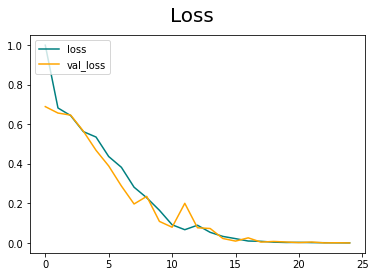

In [106]:
fig=plt.figure()
plt.plot(hist.history['loss'],color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss',fontsize=20)
plt.legend(loc="upper left")
plt.show()

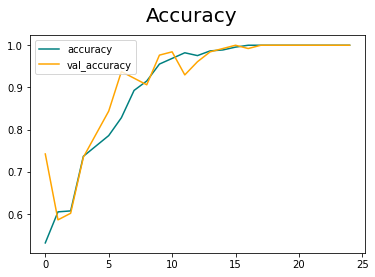

In [107]:
fig=plt.figure()
plt.plot(hist.history['accuracy'],color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy',fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
#Evaluate

In [108]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [109]:
pre=Precision()
re=Recall()
acc=BinaryAccuracy()

In [110]:
for batch in test.as_numpy_iterator():
    X,y=batch
    yhat=model.predict(X)
    pre.update_state(y,yhat)
    re.update_state(y,yhat)
    acc.update_state(y,yhat)

1/1 [==============================] - 0s 160ms/step


In [111]:
pre.result().numpy()

1.0

In [112]:
re.result().numpy()

1.0

In [113]:
acc.result().numpy()

1.0

In [ ]:
#Test

In [114]:
import cv2

In [ ]:
#Image 1

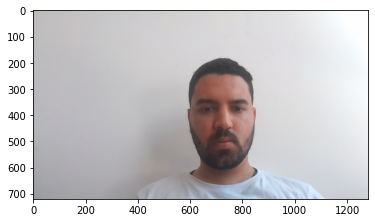

In [186]:
img=cv2.imread('1.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

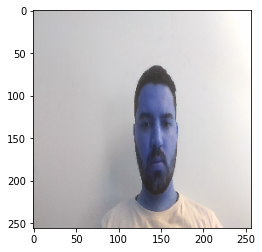

In [187]:
resize=tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [188]:
yhat=model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 48ms/step


In [189]:
if yhat>0.5:
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad


In [ ]:
#Image 2

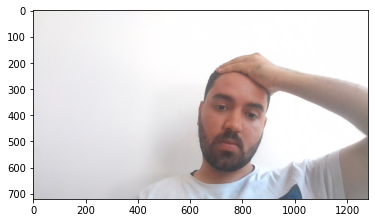

In [230]:
img=cv2.imread('2.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

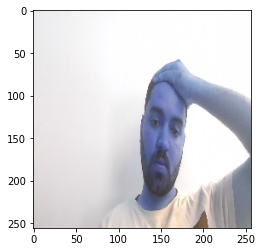

In [231]:
resize=tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [232]:
yhat=model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 46ms/step


In [233]:
yhat

array([[0.94398344]], dtype=float32)

In [193]:
if yhat>0.5:
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad


In [ ]:
#Image 3

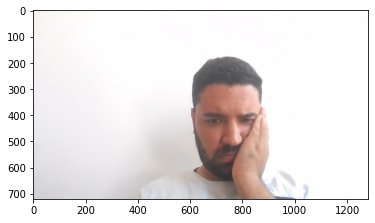

In [194]:
img=cv2.imread('3.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

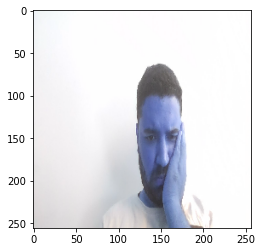

In [195]:
resize=tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [196]:
yhat=model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 47ms/step


In [197]:
if yhat>0.5:
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad


In [ ]:
#Image 4

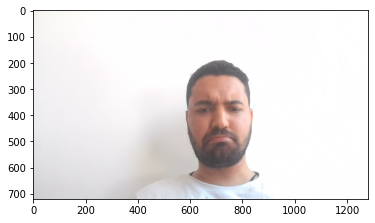

In [198]:
img=cv2.imread('4.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

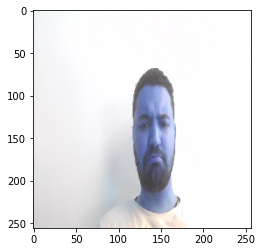

In [199]:
resize=tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [200]:
yhat=model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 31ms/step


In [201]:
if yhat>0.5:
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad


In [ ]:
#Image 5

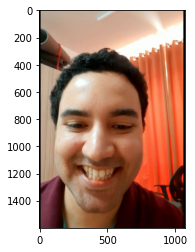

In [219]:
img=cv2.imread('8.jpeg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

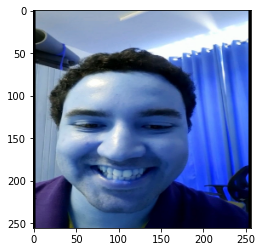

In [220]:
resize=tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [221]:
yhat=model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 47ms/step


In [222]:
if yhat>0.5:
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


In [ ]:
#image 6

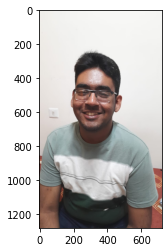

In [226]:
img=cv2.imread('9.jpeg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

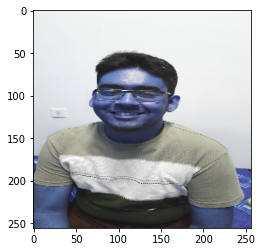

In [227]:
resize=tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [228]:
yhat=model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 158ms/step


In [229]:
if yhat>0.5:
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


In [ ]:
#Save the Model

In [223]:
from tensorflow.keras.models import load_model

In [224]:
model.save(os.path.join('models','happysadmodel.h5'))

In [225]:
new_model=load_model(os.path.join('models','happysadmodel.h5'))